In [29]:
import numpy as np
from sklearn import preprocessing

In [30]:
data = np.array([[3, -1.5, 2, -5.4], [0, 4, -0.3, 2.1], [1, 3.3, -1.9, -4.3]])

In [31]:
data

array([[ 3. , -1.5,  2. , -5.4],
       [ 0. ,  4. , -0.3,  2.1],
       [ 1. ,  3.3, -1.9, -4.3]])

In [32]:
data_standardized = preprocessing.scale(data)
print("Mean : ", data_standardized.mean(axis = 0))
print("standard deviation : ", data_standardized.std(axis = 0))

Mean :  [ 5.55111512e-17 -1.11022302e-16 -7.40148683e-17 -7.40148683e-17]
standard deviation :  [1. 1. 1. 1.]


In [33]:
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data_scaled = data_scaler.fit_transform(data)
print(data_scaled)

[[1.         0.         1.         0.        ]
 [0.         1.         0.41025641 1.        ]
 [0.33333333 0.87272727 0.         0.14666667]]


In [34]:
normal_data = preprocessing.normalize(data, "l1")
print(normal_data)

[[ 0.25210084 -0.12605042  0.16806723 -0.45378151]
 [ 0.          0.625      -0.046875    0.328125  ]
 [ 0.0952381   0.31428571 -0.18095238 -0.40952381]]


In [35]:
binarized_data = preprocessing.Binarizer(threshold=1.4).transform(data)
binarized_data

array([[1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [0., 1., 0., 0.]])

In [36]:
encoder = preprocessing.OneHotEncoder()
encoder.fit([[0, 2, 1, 12], [1, 3, 5, 3], [2, 3, 2, 12], [1, 2, 4, 3]])
encoded_vector = encoder.transform([[2,3,5,3]]).toarray()
encoded_vector

array([[0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.]])

In [37]:
label_encoder = preprocessing.LabelEncoder()
data = ['audi', 'ford', 'audi', 'toyota', 'ford', 'bmw']
label_encoder.fit(data)
for i, item in enumerate(label_encoder.classes_):
    print(item," --> ",i)


audi  -->  0
bmw  -->  1
ford  -->  2
toyota  -->  3


In [38]:
labels = ['toyota', 'ford', 'audi']
label_encoded = label_encoder.transform(labels)
print(labels)
print(label_encoded)

['toyota', 'ford', 'audi']
[3 2 0]


In [39]:
label_encoded = [1,2,3,1,0]
label_decoded = label_encoder.inverse_transform(label_encoded)
print(label_encoded)
print(list(label_decoded))

[1, 2, 3, 1, 0]
['bmw', 'ford', 'toyota', 'bmw', 'audi']


Coefficient :  [0.39217986]
Intercept :  2.9135444769492036


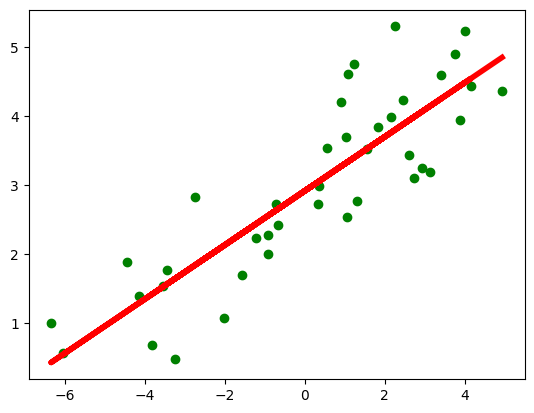

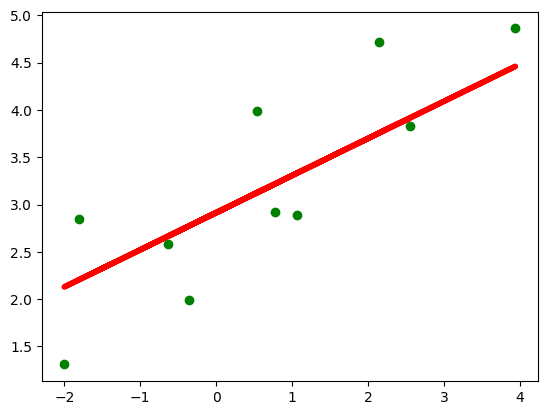

In [40]:
from sklearn import linear_model
from matplotlib import pyplot as plt
x = []
y = []
with open("data_singlevar.txt", "r") as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(",")]
        x.append(xt)
        y.append(yt)
num_training = int(0.8 * len(x))
num_test = len(x) - num_training
# Training data
x_train = np.array(x[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])
# Test data
x_test = np.array(x[num_training:]).reshape((num_test,1))
y_test = np.array(y[num_training:])


linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(x_train,y_train)

y_train_predict = linear_regressor.predict(x_train)
plt.figure()
plt.scatter(x_train, y_train, color='green')
plt.plot(x_train, y_train_predict, color='red', linewidth=4)


y_test_predict = linear_regressor.predict(x_test)
plt.figure()
plt.scatter(x_test, y_test, color='green')
plt.plot(x_test, y_test_predict, color='red', linewidth=4)

print ("Coefficient : ",linear_regressor.coef_)
print ("Intercept : ",linear_regressor.intercept_)

In [41]:
import sklearn.metrics as sm

In [42]:
print("mean absolute error: ", round(sm.mean_absolute_error(y_test, y_test_predict),2))
print("mean squared error: ", round(sm.mean_squared_error(y_test, y_test_predict),2))
print("median absolute error: ", round(sm.median_absolute_error(y_test, y_test_predict),2))
print("explained variance score: ", round(sm.explained_variance_score(y_test, y_test_predict),2))
print("r2 score: ", round(sm.r2_score(y_test, y_test_predict),2))

mean absolute error:  0.54
mean squared error:  0.38
median absolute error:  0.54
explained variance score:  0.68
r2 score:  0.68


In [43]:
import pickle
from sklearn.linear_model import Ridge

In [44]:
output = "saved_model.pkl"
with open(output, "wb") as p:
    pickle.dump(linear_regressor,p)

In [45]:

with open("saved_model.pkl", "rb") as p:
    linear_model = pickle.load(p)
    y_test_pred_new = linear_model.predict(x_test)
    print("new error : ", round(sm.mean_absolute_error(y_test, y_test_pred_new),2))
    # ridge_regressor = linear_model.Ridge(alpa = True,fit_intercept = True,max_iter = 10000)

new error :  0.54


In [46]:
ridge_regressor = Ridge(alpha = True,fit_intercept = True,max_iter = 10000)

In [47]:
ridge_regressor.fit(x_train,y_train)
y_test_predict_ridge = ridge_regressor.predict(x_test)
print(round(sm.mean_absolute_error(y_test,y_test_predict_ridge),2))
print(round(sm.mean_squared_error(y_test,y_test_predict_ridge),2))
print(round(sm.median_absolute_error(y_test,y_test_predict_ridge),2))
print(round(sm.explained_variance_score(y_test,y_test_predict_ridge),2))
print(round(sm.r2_score(y_test,y_test_predict_ridge),2))

0.54
0.38
0.54
0.68
0.67


In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
polynomial = PolynomialFeatures(degree=3)
x_train_polynomial = polynomial.fit_transform(x_train)
x_train_polynomial

array([[ 1.00000000e+00,  4.94000000e+00,  2.44036000e+01,
         1.20553784e+02],
       [ 1.00000000e+00, -1.58000000e+00,  2.49640000e+00,
        -3.94431200e+00],
       [ 1.00000000e+00, -4.45000000e+00,  1.98025000e+01,
        -8.81211250e+01],
       [ 1.00000000e+00, -6.06000000e+00,  3.67236000e+01,
        -2.22545016e+02],
       [ 1.00000000e+00, -1.22000000e+00,  1.48840000e+00,
        -1.81584800e+00],
       [ 1.00000000e+00, -3.55000000e+00,  1.26025000e+01,
        -4.47388750e+01],
       [ 1.00000000e+00,  3.60000000e-01,  1.29600000e-01,
         4.66560000e-02],
       [ 1.00000000e+00, -3.24000000e+00,  1.04976000e+01,
        -3.40122240e+01],
       [ 1.00000000e+00,  1.31000000e+00,  1.71610000e+00,
         2.24809100e+00],
       [ 1.00000000e+00,  2.17000000e+00,  4.70890000e+00,
         1.02183130e+01],
       [ 1.00000000e+00,  2.94000000e+00,  8.64360000e+00,
         2.54121840e+01],
       [ 1.00000000e+00, -9.20000000e-01,  8.46400000e-01,
      

In [50]:
# datapoint = [0.39,2.78,7.11]
# poly_datapoint = polynomial.fit_transform(datapoint)
# poly_linear_model = linear_model.LinearRegression()
# # poly_linear_model.fit()

In [51]:
x = np.array([[3,1], [2,5], [1,8], [6,4], [5,2], [3,5], [4,7], [4,-1]])
y = [0, 1, 1, 0, 0, 1, 1, 0]
class_0 = np.array([x[i] for i in range(len(x)) if y[i] == 0])
class_1 = np.array([x[i] for i in range(len(x)) if y[i] == 1])
class_1,class_0

(array([[2, 5],
        [1, 8],
        [3, 5],
        [4, 7]]),
 array([[ 3,  1],
        [ 6,  4],
        [ 5,  2],
        [ 4, -1]]))

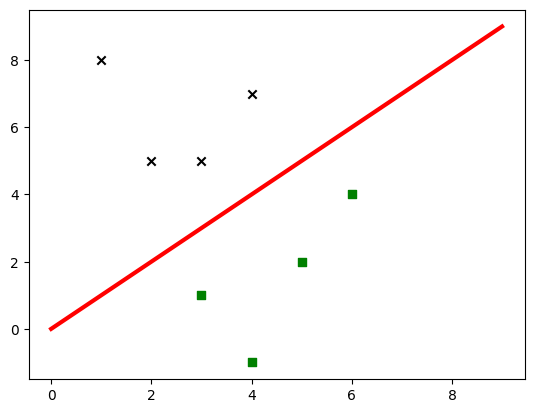

In [52]:
line_x = range(10)
line_y = line_x
plt.figure()
plt.scatter(class_0[:,0], class_0[:,1], color='green', marker='s')
plt.scatter(class_1[:,0], class_1[:,1], color='black', marker='x')
plt.plot(line_x, line_y, color = 'red', linewidth = 3)
plt.show()